<a href="https://colab.research.google.com/github/Darshan2104/PlayWithPytorch/blob/main/FeedForwardNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


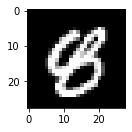

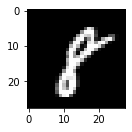

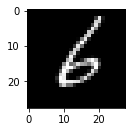

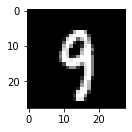

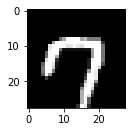

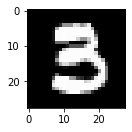

In [2]:
# GOAL : Classify the image
# MNIST
# DataLoader, Transformation
# MultiLayer NN, Activation Function
# Loss and Optimization
# Training loop (Batch Optimization)
# Model Evaluation
# GPU support

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper Paramters
input_size = 784    # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.01

# MNIST Data
train_dataset = torchvision.datasets.MNIST(root='./data', train =True, transform = transforms.ToTensor(), download =True)
test_dataset = torchvision.datasets.MNIST(root='./data', train =False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset =train_dataset, batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset =test_dataset, batch_size=batch_size, shuffle = False)

# One Batch of data
examples = iter(train_loader)
samples, lable = examples.next()
print(samples.shape, lable.shape) # 100 images(batch-size) 1-channle 28x28 image size 

for i in range(6):
  plt.subplot(2,3,i+1) # 2 rows and 3 columns and index (i+1)
  plt.imshow(samples[i][0],cmap='gray')
  plt.show()

In [5]:
class NeuralNet(nn.Module):
  def __init__(self,input_size, hidden_size, num_classes):
    super(NeuralNet,self).__init__()
    # create out layers
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr =learning_rate)

# training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  # loop over all the batches
  for i,(images, labels) in enumerate(train_loader):
    # Shape  100, 1, 28, 28
    # input size= 784 so tensor  need 100, 784
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    # forward pass
    output = model(images)
    loss = criterion(output, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100 == 0:
      print(f'epoch : {epoch+1} / {num_epochs}, step : {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


# testing

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  
  for images, labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

# max returns  values and index
    _,predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc:.4f}')

epoch : 1 / 2, step : 100/600, loss = 0.2596
epoch : 1 / 2, step : 200/600, loss = 0.2146
epoch : 1 / 2, step : 300/600, loss = 0.1938
epoch : 1 / 2, step : 400/600, loss = 0.1745
epoch : 1 / 2, step : 500/600, loss = 0.1910
epoch : 1 / 2, step : 600/600, loss = 0.0767
epoch : 2 / 2, step : 100/600, loss = 0.0527
epoch : 2 / 2, step : 200/600, loss = 0.1463
epoch : 2 / 2, step : 300/600, loss = 0.1420
epoch : 2 / 2, step : 400/600, loss = 0.0367
epoch : 2 / 2, step : 500/600, loss = 0.1280
epoch : 2 / 2, step : 600/600, loss = 0.0058
accuracy = 96.5200
